In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Vanilla Monte Carlo Estimator
- Goal: approximate expected value of function of random variable X distributed according to density p
- Vanilla MC: draw samples of X from p, evaluate function and average
- Theory: if we can draw iid samples, CLT and LLN ensures i) unbiased, ii) consistent, iii) error decreases in sample size

In [3]:
sampler = np.random.default_rng()
def sample_truncated_exponential():
    while True:
        sample = sampler.exponential()
        if sample < 10:
            return sample
        else:
            continue

Text(0.5, 1.0, 'PDF of X')

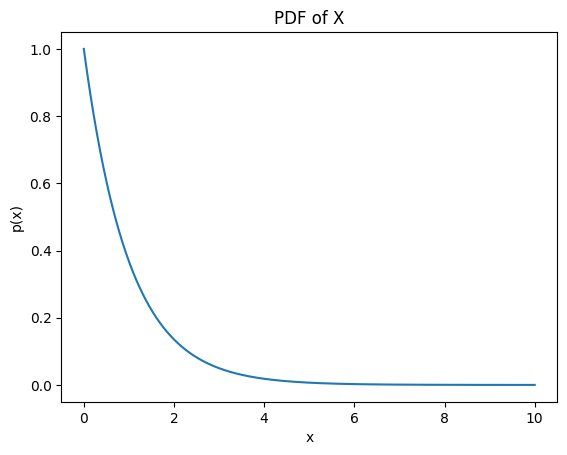

In [4]:
x_range = np.linspace(0,10,10000)
p = lambda x: np.exp(-x) / (1 - np.exp(-10))
plt.plot(x_range, p(x_range))
plt.xlabel("x")
plt.ylabel("p(x)")
plt.title("PDF of X")

- Trying Reimann discretization

In [151]:
sum([p(i) for i in [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]])

0.9595173756674716

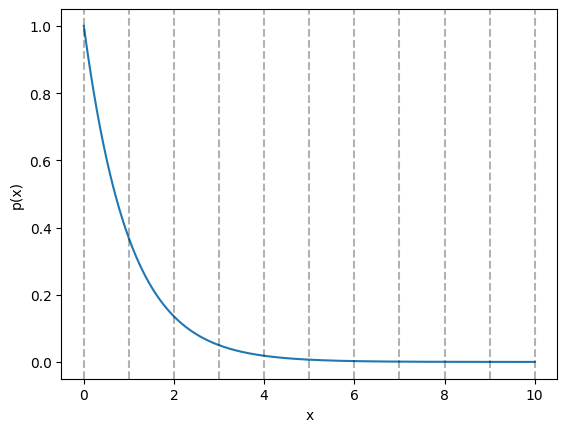

In [149]:
plt.plot(x_range, p(x_range))
plt.xlabel("x")
plt.ylabel("p(x)")
for i in range(11):
    plt.axvline(x=i, linestyle="dashed", color="black", alpha=0.3)

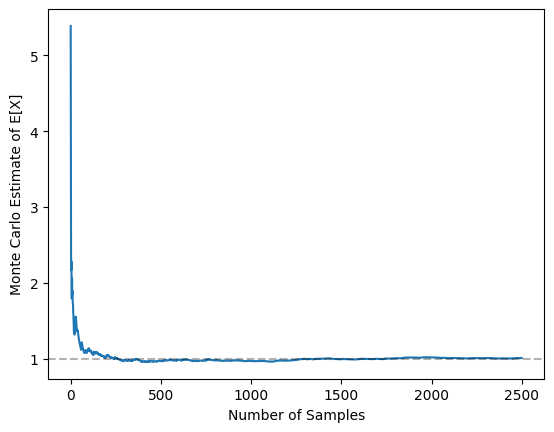

In [11]:
max_N = 2500
f = lambda x: x
samples = []
mc_estimates = []
for N in range(1,max_N + 1):
    samples.append(sample_truncated_exponential())
    mc_estimates.append(sum(f(x) for x in samples) / len(samples)) 

plt.plot(mc_estimates)
plt.ylabel("Monte Carlo Estimate of E[X]")
plt.xlabel("Number of Samples")
plt.axhline(-11*np.exp(-10)+1, linestyle="dashed", color="black", alpha=0.3)
plt.show()

In [154]:
mc_estimates[-2]

0.9754058454246585

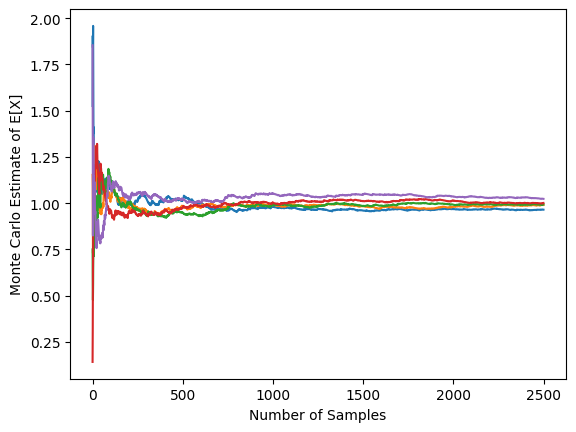

In [12]:
num_examples = 5
max_N = 2500
f = lambda x: x
for K in range(num_examples):
    samples = []
    mc_estimates = []
    for N in range(1,max_N + 1):
        samples.append(sample_truncated_exponential())
        mc_estimates.append(sum(f(x) for x in samples) / len(samples)) 
    plt.plot(mc_estimates)
plt.ylabel("Monte Carlo Estimate of E[X]")
plt.xlabel("Number of Samples")
plt.show()

Problem: when energy of function under the sampling distribution p is large, variance of MC estimator is high and will struggle to converge for reasonable N

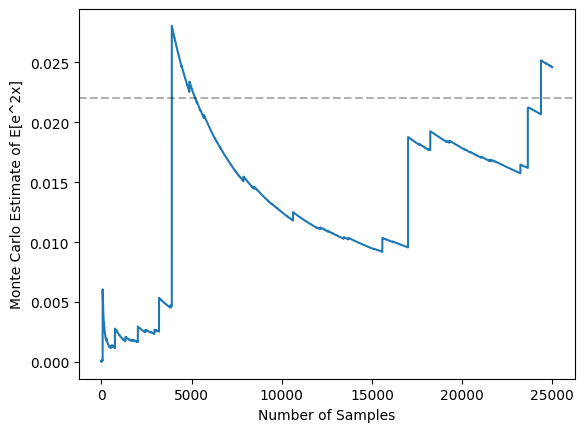

In [42]:
max_N = 25000
f = lambda x: 0.000001*np.exp(2*x)
samples = []
mc_estimates = []
for N in range(1,max_N + 1):
    samples.append(sample_truncated_exponential())
    mc_estimates.append(sum(f(x) for x in samples) / len(samples)) 

plt.plot(mc_estimates)
plt.axhline(0.000001*(np.exp(10)-1), linestyle="dashed", color="black", alpha=0.3)
plt.ylabel("Monte Carlo Estimate of E[e^2x]")
plt.xlabel("Number of Samples")
plt.show()

 - This happens because sampling distribution not aligned with function

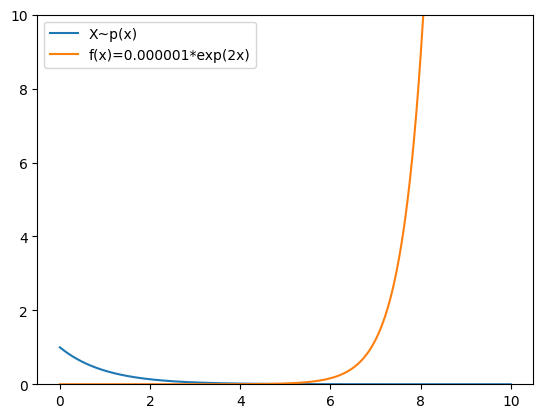

In [46]:
plt.plot(x_range, p(x_range), label="X~p(x)")
plt.plot(x_range, f(x_range), label="f(x)=0.000001*exp(2x)")
plt.ylim((0,10))
plt.legend()
plt.show()

# Importance Sampling
- Idea: replace sampling density by a density that better aligns with function of interest, and scale by Radon-Nikodym derivative

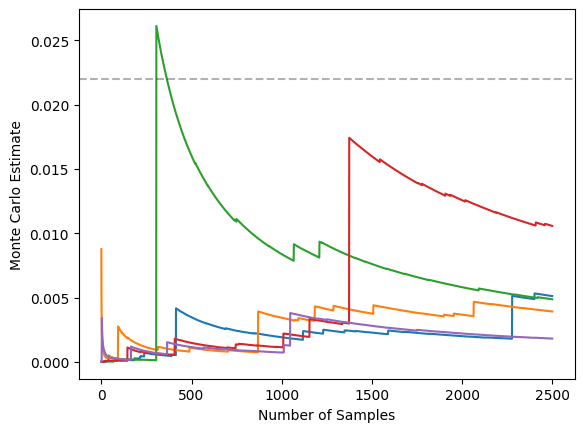

In [34]:
num_examples = 5
f = lambda x: 0.000001*np.exp(2*x)
max_N = 2500
for K in range(num_examples):
    samples = []
    mc_estimates = []
    for N in range(1,max_N + 1):
        samples.append(sample_truncated_exponential())
        mc_estimates.append(sum(f(x) for x in samples) / len(samples)) 
    plt.plot(mc_estimates)
plt.axhline(0.000001*(np.exp(10)-1), linestyle="dashed", color="black", alpha=0.3)
plt.ylabel("Monte Carlo Estimate")
plt.xlabel("Number of Samples")
plt.show()

- Solution: replace with uniform distribution on [0,10]

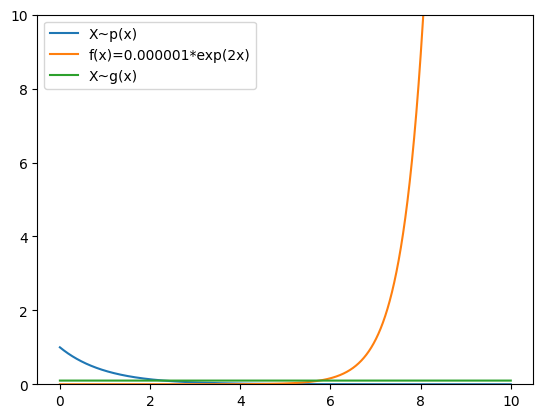

In [20]:
g = lambda x: 0.1
plt.plot(x_range, p(x_range), label="X~p(x)")
plt.plot(x_range, f(x_range), label="f(x)=0.000001*exp(2x)")
plt.plot(x_range, [0.1 for x in x_range], label="X~g(x)")
plt.ylim((0,10))
plt.legend()
plt.show()

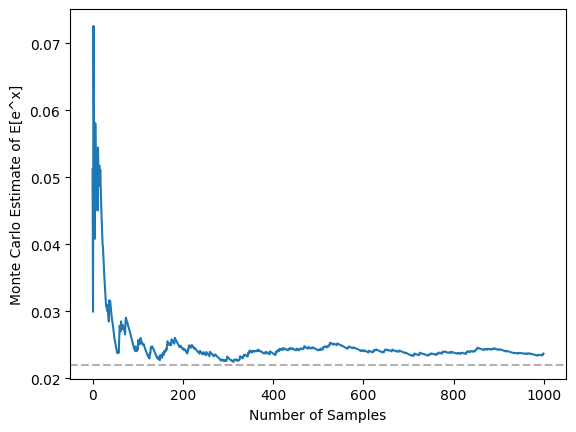

In [78]:
max_N = 1000
f = lambda x: 0.000001*np.exp(2*x)
g = lambda x: 0.1
samples = []
mc_estimates = []
for N in range(1,max_N + 1):
    samples.append(sampler.uniform(low=0, high=10))
    mc_estimates.append(sum([(f(x)*p(x))/g(x)for x in samples]) / len(samples)) 

plt.plot(mc_estimates)
plt.axhline(0.000001*(np.exp(10)-1), linestyle="dashed", color="black", alpha=0.3)
plt.ylabel("Monte Carlo Estimate of E[e^x]")
plt.xlabel("Number of Samples")
plt.show()

 - Try truncated Gaussian

In [21]:
def sample_truncated_normal(loc=8, scale=1):
    while True:
        sample = sampler.normal(loc=loc, scale=scale)
        if sample > 0 and sample < 10:
            return sample
        else:
            continue

In [22]:
q = lambda x: np.exp(-0.5*(x-8)**2) / 2.45
f = lambda x: 0.000001*np.exp(2*x)

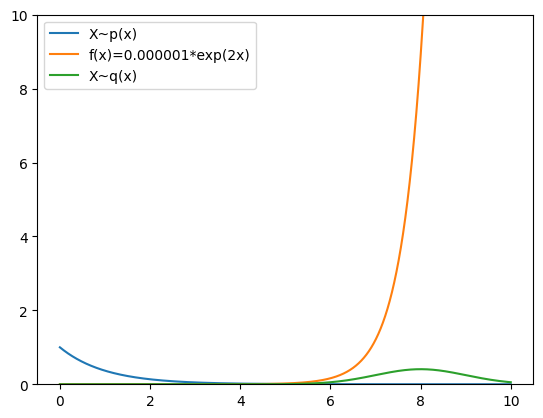

In [23]:
plt.plot(x_range, p(x_range), label="X~p(x)")
plt.plot(x_range, f(x_range), label="f(x)=0.000001*exp(2x)")
plt.plot(x_range, q(x_range), label="X~q(x)")
plt.ylim((0,10))
plt.legend()
plt.show()

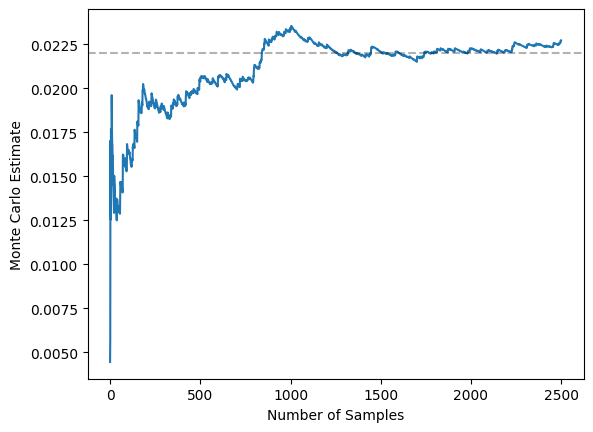

In [29]:
max_N = 2500
samples = []
mc_estimates = []
for N in range(1,max_N + 1):
    samples.append(sample_truncated_normal())
    mc_estimates.append(sum([(f(x)*p(x))/q(x) for x in samples]) / len(samples)) 

plt.plot(mc_estimates)
plt.axhline(0.000001*(np.exp(10)-1), linestyle="dashed", color="black", alpha=0.3)
plt.ylabel("Monte Carlo Estimate")
plt.xlabel("Number of Samples")
plt.show()

- Reduced variance

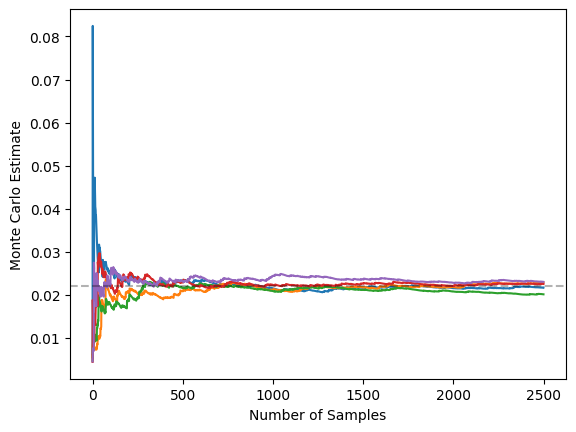

In [35]:
for K in range(num_examples):
    samples = []
    mc_estimates = []
    for N in range(1,max_N + 1):
        samples.append(sample_truncated_normal())
        mc_estimates.append(sum((f(x)*p(x))/q(x) for x in samples) / len(samples)) 
    plt.plot(mc_estimates)
plt.axhline(0.000001*(np.exp(10)-1), linestyle="dashed", color="black", alpha=0.3)
plt.ylabel("Monte Carlo Estimate")
plt.xlabel("Number of Samples")
plt.show()

# Control Variates

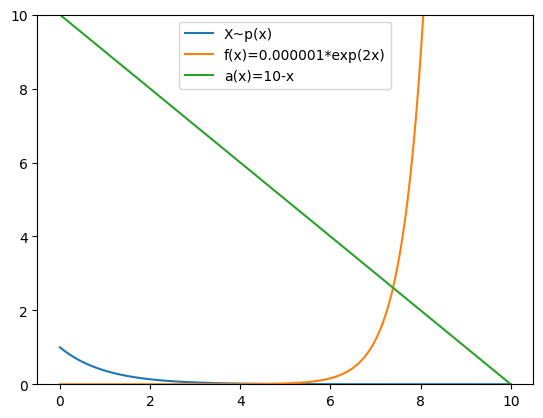

In [37]:
a = lambda x: 10-x
plt.plot(x_range, p(x_range), label="X~p(x)")
plt.plot(x_range, f(x_range), label="f(x)=0.000001*exp(2x)")
plt.plot(x_range, a(x_range), label="a(x)=10-x")
plt.ylim((0,10))
plt.legend()
plt.show()

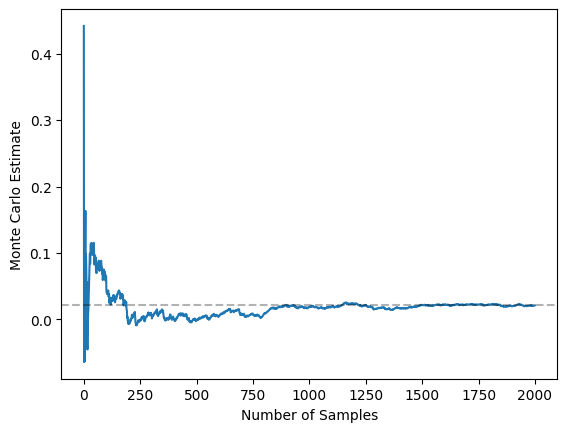

In [45]:
expec_a = 9 / (1 - np.exp(-10))
max_N = 2000
beta = 0.5
samples = []
mc_estimates = []
for N in range(1,max_N + 1):
    samples.append(sample_truncated_exponential())
    mc_estimates.append(sum((f(x) + beta*(a(x) - expec_a)) for x in samples) / len(samples)) 
plt.plot(mc_estimates)
plt.axhline(0.000001*(np.exp(10)-1), linestyle="dashed", color="black", alpha=0.3)
plt.ylabel("Monte Carlo Estimate")
plt.xlabel("Number of Samples")
plt.show()

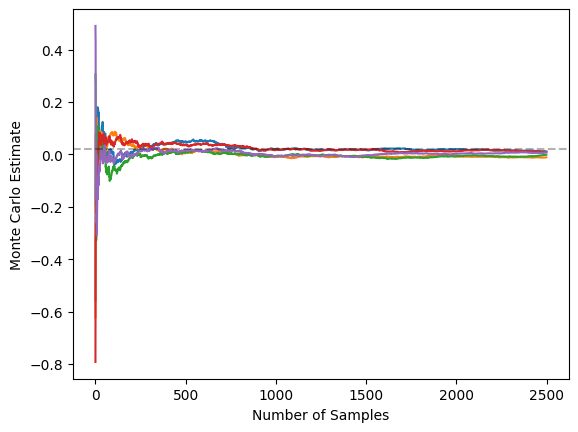

In [46]:
num_examples = 5
max_N = 2500
for K in range(num_examples):
    samples = []
    mc_estimates = []
    for N in range(1,max_N + 1):
        samples.append(sample_truncated_exponential())
        mc_estimates.append(sum((f(x) + beta*(a(x) - expec_a)) for x in samples) / len(samples)) 
    plt.plot(mc_estimates)
plt.axhline(0.000001*(np.exp(10)-1), linestyle="dashed", color="black", alpha=0.3)
plt.ylabel("Monte Carlo Estimate")
plt.xlabel("Number of Samples")
plt.show()